<a href="https://colab.research.google.com/github/dharun-narayanan/Intelligent_CropPrediction_System/blob/main/IntelligentCropPredictionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Get Dataset from drive
#Connecting to the Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# Give Dataset path in Google drive
# Loading the dataset from the drive

cost = pd.read_csv('drive/My Drive/ML_Project/datafile.csv')
rainfall = pd.read_csv('drive/My Drive/ML_Project/district_rainfall.csv')
nutrients = pd.read_csv('drive/My Drive/ML_Project/crop_recommendation.csv')

In [47]:
print('Cost Dataset Shape : ',cost.shape)
print('Rainfall Dataset Shape : ',rainfall.shape)
print('Nutrients Dataset Shape : ',nutrients.shape)

Cost Dataset Shape :  (49, 6)
Rainfall Dataset Shape :  (641, 19)
Nutrients Dataset Shape :  (2200, 8)


In [51]:
print('Cost Dataset Columns : \n',cost.columns)
print('\nRainfall Dataset Columns : \n',rainfall.columns)
print('\nNutrients Dataset Columns : \n',nutrients.columns)

Cost Dataset Columns : 
 Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

Rainfall Dataset Columns : 
 Index(['STATE_UT_NAME', 'DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb',
       'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')

Nutrients Dataset Columns : 
 Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [62]:
print('Cost Dataset : ')
cost.head()

Cost Dataset : 


,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [64]:
print('Rainfall Dataset : ')
rainfall.head()

Rainfall Dataset : 


,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [63]:
print('Nutrients Dataset : ')
nutrients.head()

Nutrients Dataset : 


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [54]:
print("Number of null elements in Cost Dataset : ",cost.isnull().sum().sum())
print("Number of null elements in Rainfall Dataset : ",rainfall.isnull().sum().sum())
print("Number of null elements in Nutrients Dataset : ",nutrients.isnull().sum().sum())

Number of null elements in Cost Dataset :  0
Number of null elements in Rainfall Dataset :  0
Number of null elements in Nutrients Dataset :  0


In [65]:
rainfall.rename(columns={'STATE_UT_NAME':'State','DISTRICT':'District'},inplace=True)

In [66]:
rainfall.columns

Index(['State', 'District', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [67]:
for x in cost['State']:
  cost.replace(x,x.upper(),inplace=True)
cost['State']

0      UTTAR PRADESH
1          KARNATAKA
2            GUJARAT
3     ANDHRA PRADESH
4        MAHARASHTRA
5        MAHARASHTRA
6             PUNJAB
7     ANDHRA PRADESH
8            GUJARAT
9            HARYANA
10         RAJASTHAN
11    MADHYA PRADESH
12     UTTAR PRADESH
13       MAHARASHTRA
14    ANDHRA PRADESH
15         KARNATAKA
16    ANDHRA PRADESH
17        TAMIL NADU
18           GUJARAT
19       MAHARASHTRA
20             BIHAR
21         KARNATAKA
22         RAJASTHAN
23     UTTAR PRADESH
24    ANDHRA PRADESH
25            ORISSA
26         RAJASTHAN
27         KARNATAKA
28    ANDHRA PRADESH
29       MAHARASHTRA
30     UTTAR PRADESH
31            ORISSA
32       WEST BENGAL
33            PUNJAB
34    ANDHRA PRADESH
35    MADHYA PRADESH
36         RAJASTHAN
37     UTTAR PRADESH
38           GUJARAT
39           HARYANA
40     UTTAR PRADESH
41         KARNATAKA
42    ANDHRA PRADESH
43       MAHARASHTRA
44        TAMIL NADU
45    MADHYA PRADESH
46            PUNJAB
47     UTTAR 

In [69]:
cost['Crop'].value_counts()

SUGARCANE               5
MAIZE                   5
MOONG                   5
COTTON                  5
RAPESEED AND MUSTARD    5
GROUNDNUT               5
GRAM                    5
PADDY                   5
ARHAR                   5
WHEAT                   4
Name: Crop, dtype: int64

In [74]:
cost.groupby('Crop')['Cost of Cultivation (`/Hectare) A2+FL'].mean()

Crop
ARHAR                   13607.646
COTTON                  28286.874
GRAM                    11719.510
GROUNDNUT               21282.782
MAIZE                   16610.150
MOONG                    7118.670
PADDY                   22810.140
RAPESEED AND MUSTARD    12260.490
SUGARCANE               52164.716
WHEAT                   17127.110
Name: Cost of Cultivation (`/Hectare) A2+FL, dtype: float64

In [76]:
rainfall.groupby('State')['ANNUAL'].mean()

State
ANDAMAN And NICOBAR ISLANDS    2911.400000
ANDHRA PRADESH                  945.073913
ARUNACHAL PRADESH              2927.375000
ASSAM                          2454.359259
BIHAR                          1200.555263
CHANDIGARH                     1070.600000
CHATISGARH                     1286.350000
DADAR NAGAR HAVELI             2374.100000
DAMAN AND DUI                  1535.700000
DELHI                           747.100000
GOA                            3278.500000
GUJARAT                         924.342308
HARYANA                         614.557143
HIMACHAL                       1371.591667
JAMMU AND KASHMIR              1016.618182
JHARKHAND                      1303.437500
KARNATAKA                      1194.616667
KERALA                         2937.392857
LAKSHADWEEP                    1600.000000
MADHYA PRADESH                 1032.310000
MAHARASHTRA                    1278.588571
MANIPUR                        2496.633333
MEGHALAYA                      3682.842857
MIZOR

In [83]:
r_mean = nutrients.groupby('label')['rainfall'].mean()
r_mean

label
apple          112.654779
banana         104.626980
blackgram       67.884151
chickpea        80.058977
coconut        175.686646
coffee         158.066295
cotton          80.398043
grapes          69.611829
jute           174.792798
kidneybeans    105.919778
lentil          45.680454
maize           84.766988
mango           94.704515
mothbeans       51.198487
mungbean        48.403601
muskmelon       24.689952
orange         110.474969
papaya         142.627839
pigeonpeas     149.457564
pomegranate    107.528442
rice           236.181114
watermelon      50.786219
Name: rainfall, dtype: float64

In [126]:
h_mean = nutrients.groupby('label')['humidity'].mean()
h_mean

label
apple          92.333383
banana         80.358123
blackgram      65.118426
chickpea       16.860439
coconut        94.844272
coffee         58.869846
cotton         79.843474
grapes         81.875228
jute           79.639864
kidneybeans    21.605357
lentil         64.804785
maize          65.092249
mango          50.156573
mothbeans      53.160418
mungbean       85.499975
muskmelon      92.342802
orange         92.170209
papaya         92.403388
pigeonpeas     48.061633
pomegranate    90.125504
rice           82.272822
watermelon     85.160375
Name: humidity, dtype: float64

In [87]:
c_label=nutrients['label'].unique()
c_label

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

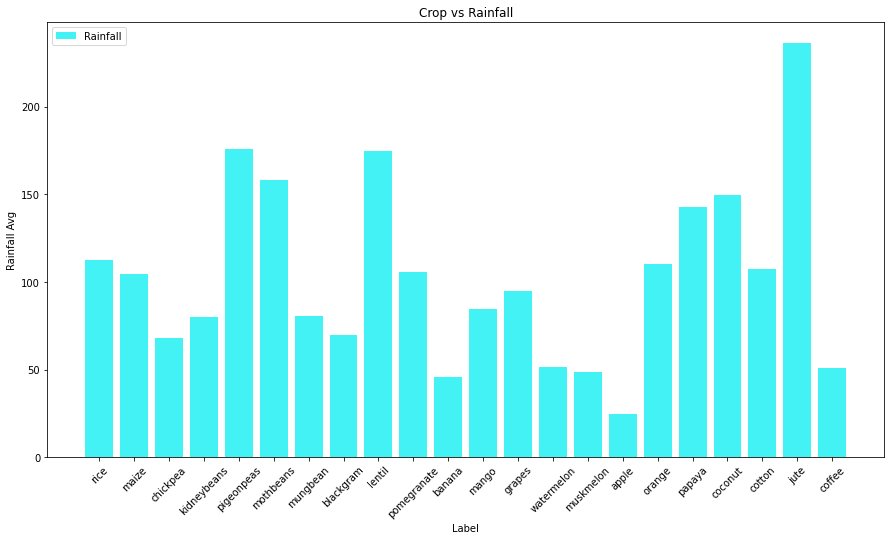

In [133]:
ax = plt.subplots(1,1, figsize=(15, 8));
plt.bar(c_label,r_mean,label="Rainfall",color='#42f2f5')
plt.xlabel('Label')
plt.ylabel('Rainfall Avg')
plt.title('Crop vs Rainfall')
plt.xticks(rotation=45)
plt.legend()
plt.show()

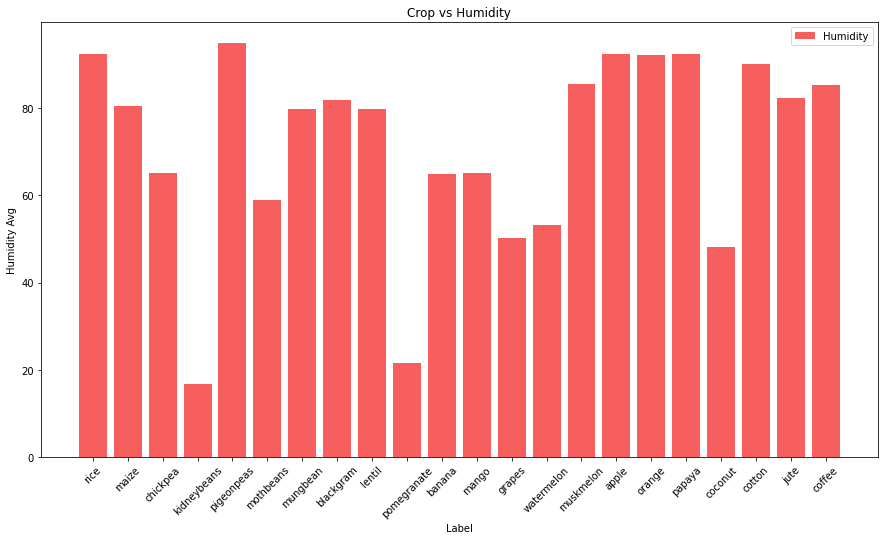

In [132]:
ax = plt.subplots(1,1, figsize=(15, 8));
plt.bar(c_label,h_mean,label="Humidity",color='#f75e5e')
plt.xlabel('Label')
plt.ylabel('Humidity Avg')
plt.title('Crop vs Humidity')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [136]:
c_lab=cost['Crop'].unique()
c_lab

array(['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY',
       'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT'], dtype=object)

In [137]:
cultivation_cost = cost.groupby('Crop')['Cost of Cultivation (`/Hectare) A2+FL'].mean()
cultivation_cost

Crop
ARHAR                   13607.646
COTTON                  28286.874
GRAM                    11719.510
GROUNDNUT               21282.782
MAIZE                   16610.150
MOONG                    7118.670
PADDY                   22810.140
RAPESEED AND MUSTARD    12260.490
SUGARCANE               52164.716
WHEAT                   17127.110
Name: Cost of Cultivation (`/Hectare) A2+FL, dtype: float64

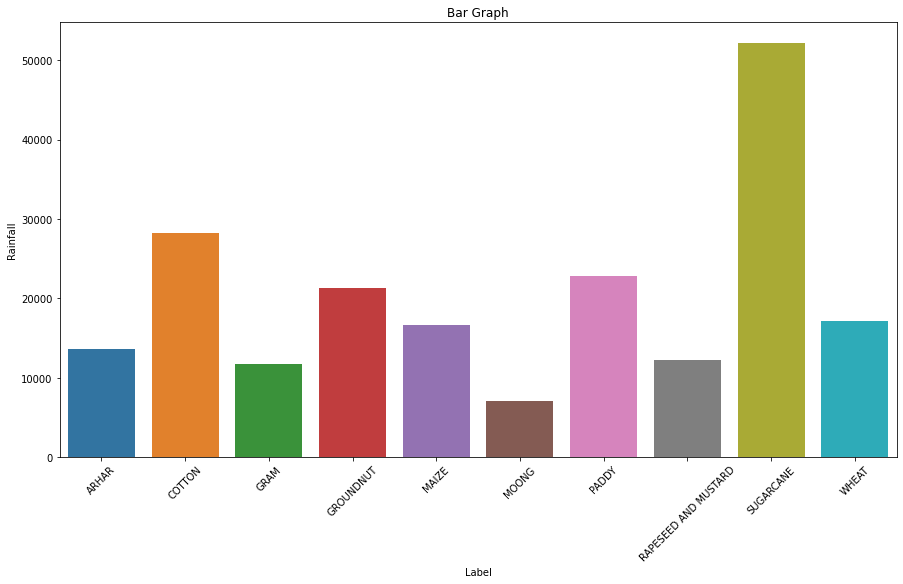

In [138]:
ax = plt.subplots(1,1, figsize=(15, 8));
sns.barplot(x=c_lab,y=cultivation_cost)
plt.xlabel('Label')
plt.ylabel('Rainfall')
plt.title('Bar Graph')
plt.xticks(rotation=45)
plt.show()